<a href="https://colab.research.google.com/github/yingxin16/SuperMario_Hackathon22PRS/blob/main/Data_Distribution_MASA_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pds

file = ('/content/[MASA Hackathon 2022] Travel Insurance Data Set .xlsx')
x = pds.read_excel(file)
x.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


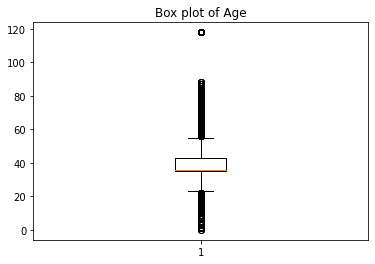

In [ ]:
# box and whisker plot for Age
plt.boxplot(x['Age'])  
plt.title('Box plot of Age')
plt.show()

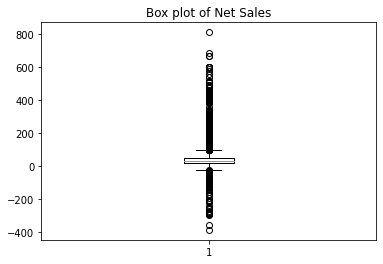

In [ ]:
# box and whisker plot for Net Sales
plt.boxplot(x['Net Sales']) 
plt.title('Box plot of Net Sales')
plt.show()

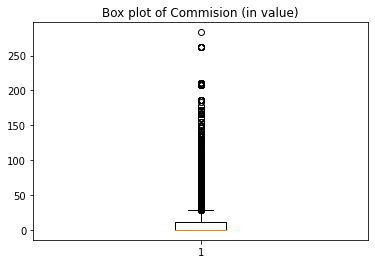

In [ ]:
# box and whisker plot for Commision
plt.boxplot(x['Commision (in value)'])  
plt.title('Box plot of Commision (in value)')
plt.show()

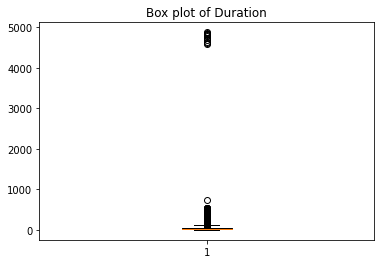

In [ ]:
# box and whisker plot for Duration
plt.boxplot(x['Duration']) 
plt.title('Box plot of Duration')
plt.show()

In [ ]:
# one - tailed z test
# significant value: 95%
# Hypothesis: Age group between 25-35 has higher trend to request claim 
# H0 : p < 39.97
# Ha : p >= 39.97
from scipy.stats import ttest_1samp
import numpy as np

ages_mean = 39.97
print(ages_mean)
tset, pval = ttest_1samp(x['Age'], ages_mean)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

39.97
p-values 0.999724036419058
we are accepting null hypothesis


In [ ]:
# one - tailed z test
# significant value: 95%
# Hypothesis: The shorter the duration, the higher the potential of claimming   
# H0 : p < 49.32
# Ha : p >= 49.32
from scipy.stats import ttest_1samp
import numpy as np

duration_mean = 49.32
print(duration_mean)
tset, pval = ttest_1samp(x['Duration'], duration_mean)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

49.32
p-values 0.9942276318057146
we are accepting null hypothesis


In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

list_1=x[(x['Duration'] >1000)].index #print out the list where it's the index of outliers
x.drop(list_1, inplace=True) #drop by specifying the index number in the dataframe, inplace=True is to ensure the changes is made in the same dataframe

# Convert dataframe into series
list1 = x['Duration']
list2 = x['Claim']
label_encoder = LabelEncoder()
label_encoder.fit(x['Claim'])
x['Claim'] = label_encoder.transform(x['Claim'])
x_claims = pds.get_dummies(x['Claim'],drop_first=True)


# Apply the pearsonr()
corr, _ = pearsonr(list1, x_claims)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.104


In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

list_1=x[(x['Age'] >100)].index #print out the list where it's the index of outliers
x.drop(list_1, inplace=True) #drop by specifying the index number in the dataframe, inplace=True is to ensure the changes is made in the same dataframe

# Convert dataframe into series
list1 = x['Age']
list2 = x['Claim']
label_encoder = LabelEncoder()
label_encoder.fit(x['Claim'])
x['Claim'] = label_encoder.transform(x['Claim'])
x_claims = pds.get_dummies(x['Claim'],drop_first=True)


# Apply the pearsonr()
corr, _ = pearsonr(list1, x_claims)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: -0.012
